In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

from ggplot import *
from scipy.stats import logistic
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [3]:
# Month index column 으로 만들기
# ,index_col="변수"

file1="c:/temp/flight_delays.csv"
flight_delays=pd.read_csv(file1, index_col="Month")
flight_delays

,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
Month,,,,,,,,,,,,,,
1,6.955843,-0.320888,7.347281,-2.043847,8.537497,18.357238,3.512640,18.164974,11.398054,10.889894,6.352729,3.107457,1.420702,3.389466
2,7.530204,-0.782923,18.657673,5.614745,10.417236,27.424179,6.029967,21.301627,16.474466,9.588895,7.260662,7.114455,7.784410,3.501363
3,6.693587,-0.544731,10.741317,2.077965,6.730101,20.074855,3.468383,11.018418,10.039118,3.181693,4.892212,3.330787,5.348207,3.263341
4,4.931778,-3.009003,2.780105,0.083343,4.821253,12.640440,0.011022,5.131228,8.766224,3.223796,4.376092,2.660290,0.995507,2.996399
5,5.173878,-1.716398,-0.709019,0.149333,7.724290,13.007554,0.826426,5.466790,22.397347,4.141162,6.827695,0.681605,7.102021,5.680777
6,8.191017,-0.220621,5.047155,4.419594,13.952793,19.712951,0.882786,9.639323,35.561501,8.338477,16.932663,5.766296,5.779415,10.743462
7,3.870440,0.377408,5.841454,1.204862,6.926421,14.464543,2.001586,3.980289,14.352382,6.790333,10.262551,NaN,7.135773,10.504942
8,3.193907,2.503899,9.280950,0.653114,5.154422,9.175737,7.448029,1.896565,20.519018,5.606689,5.014041,NaN,5.106221,5.532108
9,-1.432732,-1.813800,3.539154,-3.703377,0.851062,0.978460,3.696915,-2.167268,8.000101,1.530896,-1.794265,NaN,0.070998,-1.336260


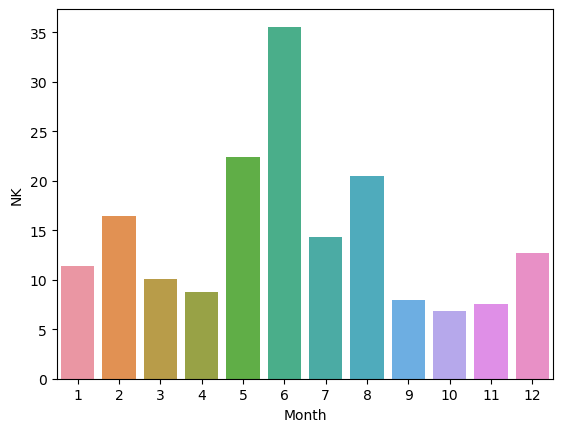

In [4]:
# SNS로 막대그래프 그리기
# sns.barplot(x=데이터이름['변수'].index, y=데이터이름['변수'])

sns.barplot(x=flight_delays.index, y=flight_delays['NK'])
plt.show()

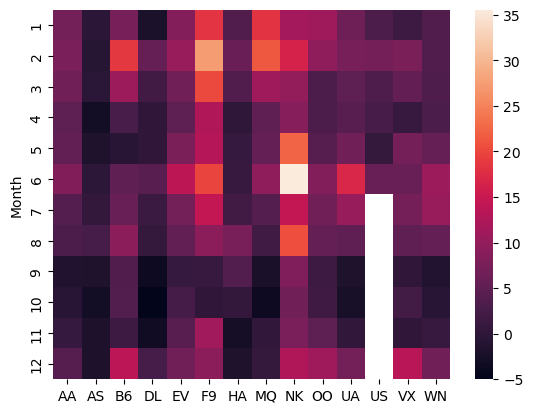

In [5]:
# Heatmap 그리기
# sns.heatmap(data=데이터이름)

# 색이 연할수록 delay 높은 것

sns.heatmap(data=flight_delays)
plt.show()

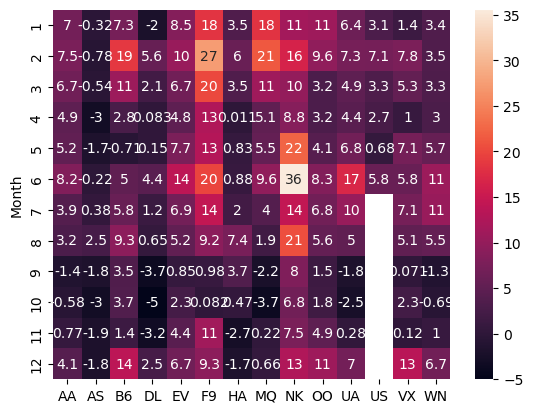

In [6]:
# heatmap의 구체적인 값 표시하기 : annot=True

sns.heatmap(data=flight_delays, annot=True)
plt.show()

# Linear Regression Model
# LRM

In [7]:
file2="c:/temp/B_data2_1.csv"
data2=pd.read_csv(file2)
data2

,price,crime,nox,rooms,dist,radial,proptax,stratio,lowstat
0,24.000000,0.006,5.38,6.57,4.09,0,29.600000,15.300000,4.98
1,21.599001,0.027,4.69,6.42,4.97,0,24.200001,17.799999,9.14
2,34.700001,0.027,4.69,7.18,4.97,0,24.200001,17.799999,4.03
3,33.400002,0.032,4.58,7.00,6.06,0,22.200001,18.700001,2.94
4,36.199001,0.069,4.58,7.15,6.06,0,22.200001,18.700001,5.33
...,...,...,...,...,...,...,...,...,...
501,22.400000,0.063,5.73,6.59,2.48,0,27.299999,21.000000,9.67
502,20.600000,0.045,5.73,6.12,2.29,0,27.299999,21.000000,9.08
503,23.899000,0.061,5.73,6.98,2.17,0,27.299999,21.000000,5.64
504,22.000000,0.110,5.73,6.79,2.39,0,27.299999,21.000000,6.48


## OLS

In [8]:
# OLS 식 만들기

y=data2['price']
x=data2['crime']
X=sm.add_constant(x) # 상수항 알파 추가
X

,const,crime
0,1.0,0.006
1,1.0,0.027
2,1.0,0.027
3,1.0,0.032
4,1.0,0.069
...,...,...
501,1.0,0.063
502,1.0,0.045
503,1.0,0.061
504,1.0,0.110


In [10]:
# 만든 식을 한 regression 식 OLS 결과 보기
# OLS Regression : 
# result=sm.OLS(y,X).fit()
# result.summary()

result1=sm.OLS(y,X).fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.28
Date:                Tue, 18 Apr 2023   Prob (F-statistic):           1.28e-19
Time:                        14:40:43   Log-Likelihood:                -1799.6
No. Observations:                 506   AIC:                             3603.
Df Residuals:                     504   BIC:                             3612.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.0134      0.410     58.600      0.000      23.208      24.818
crime         -0.4159      0.044     -9.449      0.000      -0.502      -0.329
==============================================================================
Omnibus:                      139.591   Durbin-Watson:                   0.716
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              294.258
Skew:                           1.489   Prob(JB):                     1.27e-64
Kurtosis:                       5.256   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
# 예측을 잘했는지 MSE 계산한다.
# MSE Mean Squared Error = loss function 손실함수
# MSE = y - yhat

yhat=result1.predict(X) # X가 주어졌을 때 예측값 yhat
yhat

0      24.010887
1      24.002154
2      24.002154
3      24.000075
4      23.984689
         ...    
501    23.987184
502    23.994669
503    23.988015
504    23.967639
505    23.993837
Length: 506, dtype: float64

In [12]:
MSE=(1/506)*sum((y-yhat)**2)
MSE

71.89938969475358

In [13]:
# MSE 작을수록 예측 잘한 것
# RMSE : root MSE = sqrt(MSE)

RMSE=np.sqrt(MSE)
RMSE

8.479350782622074

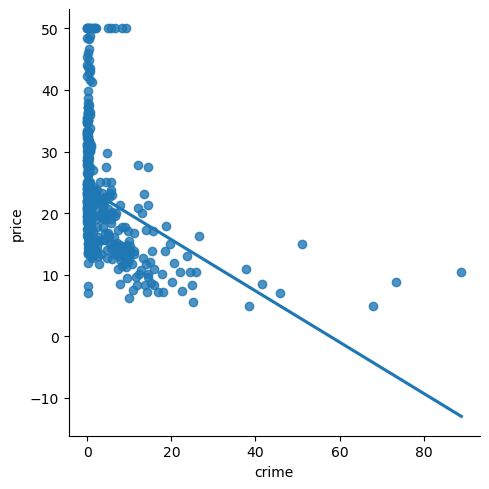

In [14]:
# Regression Plot 그리기
# sns.lmplot('x변수','y변수',data=데이터, ci=None)

sns.lmplot('crime','price',data=data2,ci=None)
plt.show()

## Log-linear Regression Model

logy= x beta + ...

In [15]:
x=np.linspace(1,10,100)
x

array([ 1.        ,  1.09090909,  1.18181818,  1.27272727,  1.36363636,
        1.45454545,  1.54545455,  1.63636364,  1.72727273,  1.81818182,
        1.90909091,  2.        ,  2.09090909,  2.18181818,  2.27272727,
        2.36363636,  2.45454545,  2.54545455,  2.63636364,  2.72727273,
        2.81818182,  2.90909091,  3.        ,  3.09090909,  3.18181818,
        3.27272727,  3.36363636,  3.45454545,  3.54545455,  3.63636364,
        3.72727273,  3.81818182,  3.90909091,  4.        ,  4.09090909,
        4.18181818,  4.27272727,  4.36363636,  4.45454545,  4.54545455,
        4.63636364,  4.72727273,  4.81818182,  4.90909091,  5.        ,
        5.09090909,  5.18181818,  5.27272727,  5.36363636,  5.45454545,
        5.54545455,  5.63636364,  5.72727273,  5.81818182,  5.90909091,
        6.        ,  6.09090909,  6.18181818,  6.27272727,  6.36363636,
        6.45454545,  6.54545455,  6.63636364,  6.72727273,  6.81818182,
        6.90909091,  7.        ,  7.09090909,  7.18181818,  7.27

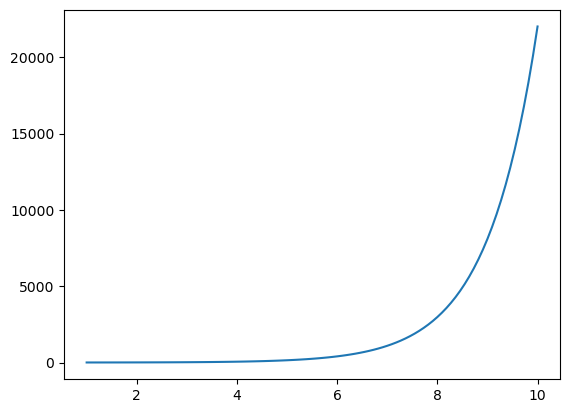

In [22]:
x=np.linspace(1,10,100)
y=np.exp(x)
plt.plot(x,y)
plt.show()

$$log(price)=\alpha+\beta\times+e$$

In [23]:
y=data2['price']
x=data2['crime']
X=sm.add_constant(x)
y1=np.log(y) # log-linear regresion의 종속변수 Y가 된다.

result2=sm.OLS(y1,X).fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     194.3
Date:                Tue, 18 Apr 2023   Prob (F-statistic):           1.38e-37
Time:                        15:12:40   Log-Likelihood:                -182.92
No. Observations:                 506   AIC:                             369.8
Df Residuals:                     504   BIC:                             378.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1241      0.017    186.110      0.000       3.091       3.157
crime         -0.0251      0.002    -13.939      0.000      -0.029      -0.022
==============================================================================
Omnibus:                       29.115   Durbin-Watson:                   0.743
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.923
Skew:                           0.455   Prob(JB):                     7.88e-10
Kurtosis:                       4.076   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
# MSE: yhat을 계산해야 한다. log(y)의 예측값이 아니고 y의 예측값을 이용해서 MSE를 계산해야 한다. 
# 1) yhat=exp(alpha_hat + beta_hat * crime + sigma^2/2)
# sigma_hat^2을 계산해야 한다. 

yhat_log=result2.predict(X)

sigma2_hat=sum((y1-yhat_log)**2)/(506-2)
yhat_log

0      3.123912
1      3.123384
2      3.123384
3      3.123258
4      3.122329
         ...   
501    3.122479
502    3.122932
503    3.122530
504    3.121298
505    3.122881
Length: 506, dtype: float64

In [25]:
yhat2=np.exp(yhat_log+sigma2_hat/2)
yhat2

0      24.154591
1      24.141847
2      24.141847
3      24.138814
4      24.116379
         ...    
501    24.120016
502    24.130929
503    24.121228
504    24.091543
505    24.129716
Length: 506, dtype: float64

In [26]:
# 이제 MSE

MSE2=(1/506)*sum((y-yhat2)**2)
MSE2

68.65166577937099

### Model 2 : $price=\alpha+\beta \times rooms + \gamma \times crime +e $

In [27]:
y=data2['price']
x=data2[['rooms','crime']]
X=sm.add_constant(x)

result3=sm.OLS(y,X).fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     298.2
Date:                Tue, 18 Apr 2023   Prob (F-statistic):           4.00e-86
Time:                        15:18:06   Log-Likelihood:                -1643.1
No. Observations:                 506   AIC:                             3292.
Df Residuals:                     503   BIC:                             3305.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -29.3769      2.590    -11.344      0.000     -34.465     -24.289
rooms          8.4097      0.405     20.758      0.000       7.614       9.206
crime         -0.2653      0.033     -8.008      0.000      -0.330      -0.200
==============================================================================
Omnibus:                      173.164   Durbin-Watson:                   0.816
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1051.477
Skew:                           1.356   Prob(JB):                    4.73e-229
Kurtosis:                       9.521   Cond. No.                         92.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
yhat3=result3.predict(X)
MSE3=(1/506)*sum((y-yhat3)**2)
MSE3

38.725458111634744

In [29]:
#38까지 떨어졌다! x변수 더 들어가니, rooms 하나 추가하니 거의 반으로 떨어졌음->더 예측력 좋아졌음. 
#rooms가 주택 가격 예측 하는 중요한 변수이구나!